In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from polara.preprocessing.dataframes import leave_one_out, reindex
from evaluation import downvote_seen_items
from dataprep import transform_indices

import matplotlib.pyplot as plt
import seaborn as sns
 
import pandas as pd
import numpy as np

## Reading data

In [3]:
from svd_utils import extend_holdout_with_train

In [4]:
train, holdout = pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv')

In [8]:
holdout = extend_holdout_with_train(train, holdout)

In [9]:
from svd_utils import matrix_from_observations, get_data_description

In [10]:
train, t_data_index = transform_indices(train, 'userid', 'movieid')

train_data_description = get_data_description(t_data_index)

train_matrix = matrix_from_observations(train, train_data_description)

In [11]:
holdout, h_data_index = transform_indices(holdout, 'userid', 'movieid')

holdout_data_description = get_data_description(h_data_index)

holdout_matrix = matrix_from_observations(holdout, holdout_data_description)

## PureSVD

In [12]:
from svd_utils import build_svd_model

In [13]:
svd_config = {'rank': 200}

V, sigma = svd_params = build_svd_model(svd_config, train, train_data_description)

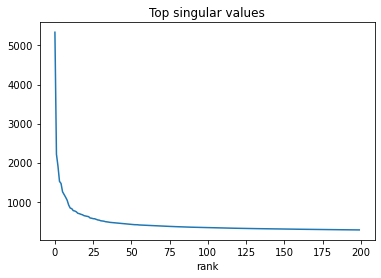

In [14]:
pd.Series(sigma).plot(title='Top singular values', xlabel='rank');

In [15]:
from svd_utils import svd_model_scoring, simple_model_recom_func

## Evaluation

In [16]:
svd_scores = svd_model_scoring(svd_params, holdout, holdout_data_description)
downvote_seen_items(svd_scores, holdout, holdout_data_description)

svd_rec = simple_model_recom_func(svd_scores, topn=20)

In [17]:
from svd_utils import write_ans_to_file

In [ ]:
write_ans_to_file(rec_matrix=svd_rec, data_index=t_data_index)

## Normalized SVD

In [ ]:
from svd_utils import build_normed_svd_model
from scipy.sparse import diags
import numpy.linalg as nla

Received in HW#1

In [ ]:
svd_config = {'rank': 320, 'f': 0.5}

In [ ]:
tmp=train[['userid', 'movieid', 'rating']].pivot_table(index='userid', columns='movieid', aggfunc=np.sum, fill_value=0, values='rating')

svd_config['norm'] = diags([nla.norm(tmp, ord=2, axis=0, keepdims=False) ** (svd_config['f'] - 1.0)], [0])

In [ ]:
V, sigma = svd_params = build_normed_svd_model(svd_config, train, train_data_description)

In [ ]:
best_svd_scores = svd_model_scoring(svd_params, holdout, holdout_data_description)
downvote_seen_items(best_svd_scores, holdout, holdout_data_description)

best_svd_rec = simple_model_recom_func(best_svd_scores, topn=20)

In [ ]:
write_ans_to_file(rec_matrix=best_svd_rec, data_index=t_data_index)